# Microseismic data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

from obspy import read
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
datahome = '/Users/glyjw/Data/HornRiver/S_Well/'
st = read(datahome + '20130806.040535.S_Well.015.?')

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


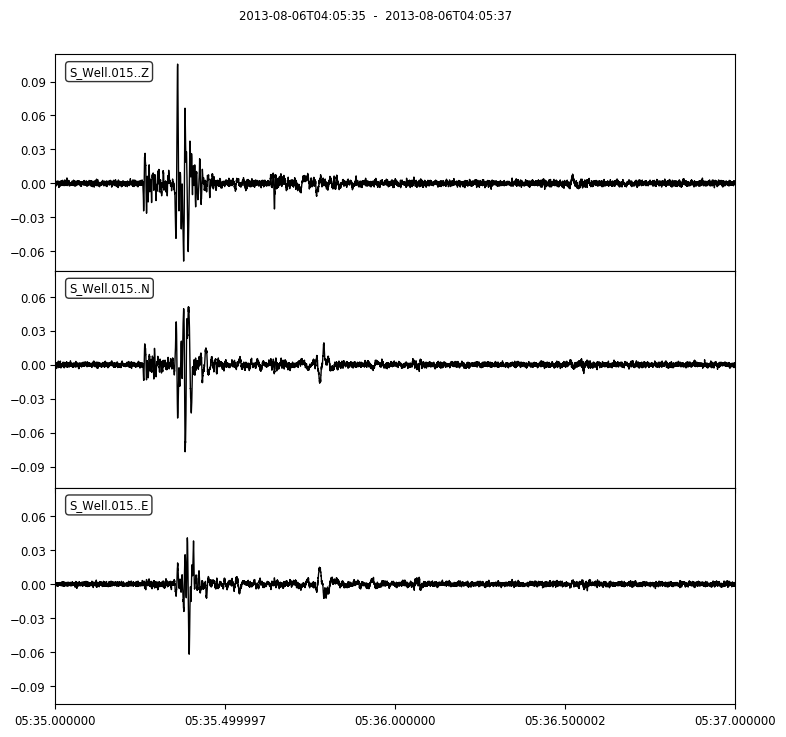

In [3]:
st.plot()

In [4]:
a=st[0].stats.starttime + st[0].stats.sac['t0']-0.05
b=st[0].stats.starttime + st[0].stats.sac['t1']+0.1
st.trim(a,b)
delta = st[0].stats.delta


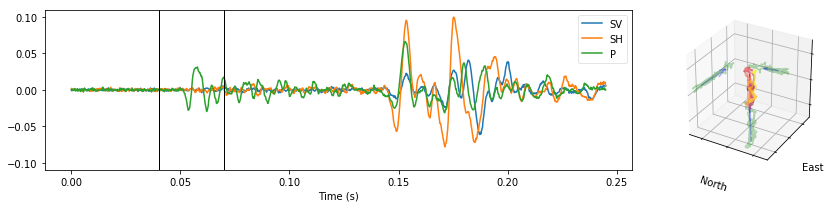

In [5]:

t = sw.Trio(st[1].data,st[2].data, st[0].data,delta=delta)
t.set_window(0.04,0.07)
t.p_rotate()
t.plot()

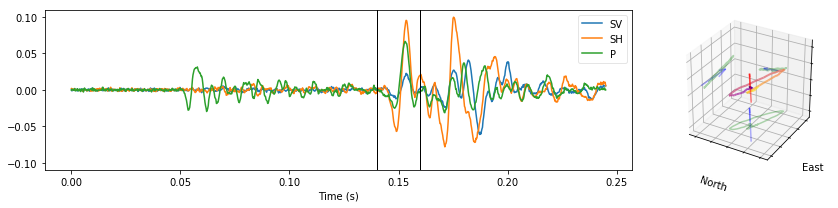

In [6]:

t.set_window(0.14,0.16)
# t.set_ray()
# t.rotate2ray()
t.plot()


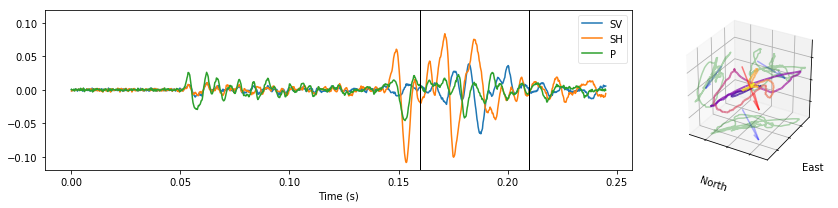

In [7]:
t.set_window(0.16,0.21)
t.set_ray()
t.rotate2ray()
t.plot()
# print(t.cmpvecs)

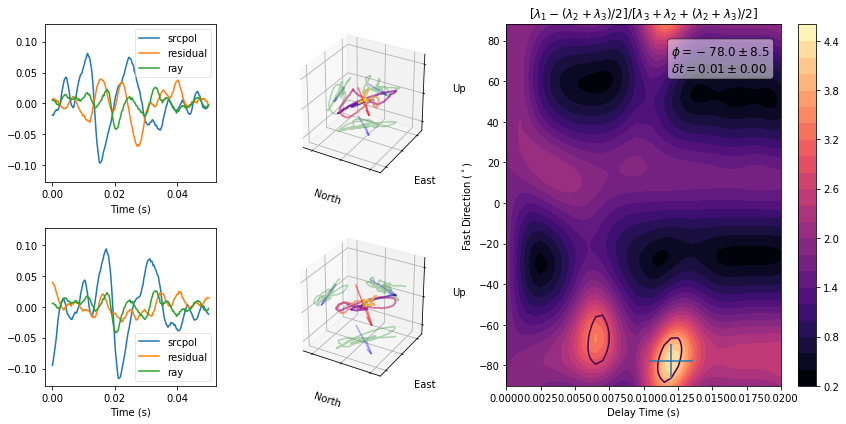

In [8]:
m = sw.Eig3dM(t,lags=(0.02,))
m.plot()

In [9]:
# get event info
from operator import itemgetter
keys = ['evla', 'evlo', 'evdp','stla','stlo','stdp']
evla, evlo, evdp, stla, stlo, stdp = itemgetter(*keys)(st[0].stats.sac)

dlo = stlo - evlo
dla = stla - evla
dz = evdp - stdp

azi = math.degrees( math.atan2( dlo, dla))
inc = math.degrees( math.atan2( (dlo**2+dla**2)**.5, dz))

print(azi,inc)

-0.7651735990134442 36.58074735860679


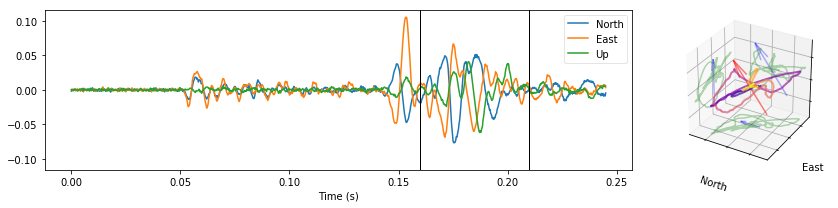

In [10]:
t.rotate2eye()
t.set_ray(azi,inc)
t.plot()

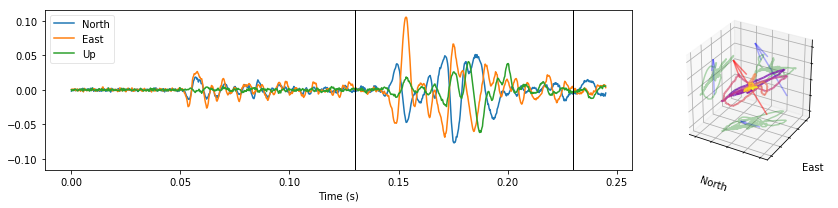

In [11]:
t.set_window(0.13,0.23)
t.plot()

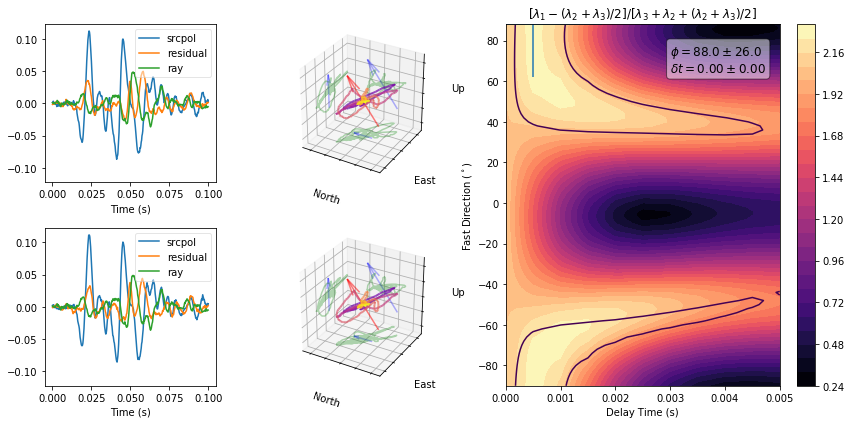

In [12]:
m = sw.Eig3dM(t,lags=(0.005,))
m.plot()

In [13]:
st = read(datahome + '20130806.040535.S_Well.*.N')

In [14]:
# set distance on traces so that they can be plotted on record section
from operator import itemgetter
def set_dist(tr):
    keys = ['evla', 'evlo', 'evdp','stla','stlo','stdp']
    evla, evlo, evdp, stla, stlo, stdp = itemgetter(*keys)(tr.stats.sac)
    dx = evla - stla
    dy = evlo - stlo
    dz = evdp - stdp
    distance = math.sqrt(dx**2 + dy**2 + dz**2)
    tr.stats.distance = distance

[ set_dist(tr) for tr in st ]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

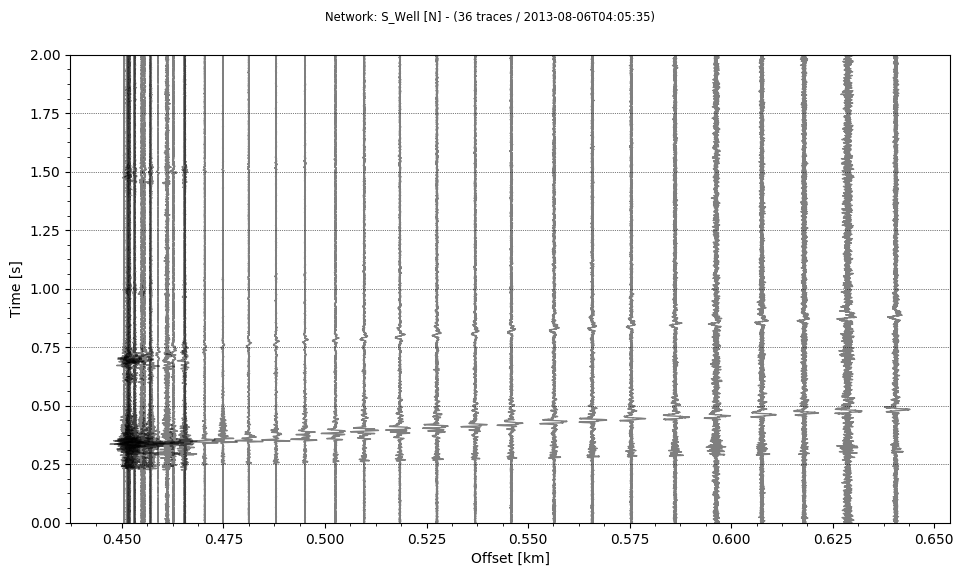

In [15]:
st.plot(type='section')

In [16]:
st[0].stats

         network: S_Well
         station: 001
        location: 
         channel: N
       starttime: 2013-08-06T04:05:35.000000Z
         endtime: 2013-08-06T04:05:37.000000Z
   sampling_rate: 3999.999755859375
           delta: 0.00025000001525879
            npts: 8001
           calib: 1.0
         _format: SAC
        distance: 640.5003050319432
             sac: AttribDict({'cmpaz': 0.0, 'e': 2.0000002, 'nzhour': 4, 'kcmpnm': 'N       ', 'nzmin': 5, 't1': 0.47275004, 'lpspol': 1, 'o': 0.0, 'stlo': 552648.0, 'evdp': 1785.5963, 'evla': 6581111.5, 'iztype': 9, 'internal0': 2.0, 'delta': 0.00025000001, 'leven': 1, 'scale': 1.0, 'nzmsec': 0, 'depmax': 0.020595092, 'dist': 0.0, 'depmen': -1.7328348e-06, 'lovrok': 1, 'b': 0.0, 'depmin': -0.016195636, 'knetwk': 'S_Well  ', 'lcalda': 0, 'iftype': 1, 'kstnm': '001     ', 'nzsec': 35, 'stdp': 1193.0, 'evlo': 552728.0, 't0': 0.29450002, 'nzyear': 2013, 'npts': 8001, 'nvhdr': 6, 'stla': 6581341.0, 'mag': -1.2827491, 'cmpinc': 90.0, 'nzjday'